# Importing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Data Inspection

In [3]:
df = pd.read_csv("..\\SteamGamesRgressor\\datasets\\raw\\combined_games.csv")
print("Combined shape:",df.shape)
df.info()

Combined shape: (69428, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69428 entries, 0 to 69427
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           7535 non-null   float64
 1   Full_game_appid      69428 non-null  int64  
 2   demo_appid           7535 non-null   float64
 3   name_x               7534 non-null   object 
 4   dlc_appid            520 non-null    float64
 5   name_y               520 non-null    object 
 6   price                69428 non-null  float64
 7   copiesSold           69428 non-null  int64  
 8   publisherClass       69428 non-null  object 
 9   aiContent            0 non-null      float64
 10  name                 69428 non-null  object 
 11  metacritic           2933 non-null   float64
 12  steam_achievements   69428 non-null  bool   
 13  steam_trading_cards  69428 non-null  bool   
 14  workshop_support     69428 non-null  bool   
 15  genres  

In [4]:
df.describe()

,Unnamed: 0,Full_game_appid,demo_appid,dlc_appid,price,copiesSold,aiContent,metacritic,achievements_total,reviewScore
count,7535.000000,6.942800e+04,7.535000e+03,5.200000e+02,69428.000000,6.942800e+04,0.0,2933.000000,37295.000000,69428.000000
mean,8137.363504,1.742130e+06,2.070466e+06,1.980804e+06,7.940826,8.584933e+04,NaN,73.669622,39.520043,71.903843
std,4220.272502,9.273455e+05,9.626569e+05,1.033833e+06,15.533680,1.820168e+06,NaN,10.233509,239.180351,28.682102
min,2.000000,1.000000e+01,2.190000e+02,2.680300e+04,0.000000,0.000000e+00,NaN,20.000000,0.000000,0.000000
25%,4731.500000,9.626250e+05,1.356070e+06,1.038998e+06,0.990000,6.000000e+01,NaN,68.000000,10.000000,60.000000
50%,8431.000000,1.612815e+06,2.099800e+06,2.058890e+06,4.990000,4.570000e+02,NaN,75.000000,18.000000,80.000000
75%,11510.500000,2.581562e+06,2.940835e+06,2.907145e+06,9.990000,3.955000e+03,NaN,81.000000,32.000000,94.000000
max,15454.000000,3.515040e+06,3.515720e+06,3.514640e+06,1900.000000,3.021580e+08,NaN,97.000000,5394.000000,100.000000


In [5]:
df.head()

,Unnamed: 0,Full_game_appid,demo_appid,name_x,dlc_appid,name_y,price,copiesSold,publisherClass,aiContent,name,metacritic,steam_achievements,steam_trading_cards,workshop_support,genres,achievements_total,release_date,supported_platforms,reviewScore
0,NaN,730,NaN,NaN,NaN,NaN,0.0,302158048,AAA,NaN,Counter-Strike 2,NaN,False,True,True,"Action, Free To Play",1.0,"Aug 21, 2012","['windows', 'linux']",87
1,NaN,570,NaN,NaN,NaN,NaN,0.0,212896574,AAA,NaN,Dota 2,90.0,False,True,True,"Action, Strategy, Free To Play",NaN,"Jul 9, 2013","['windows', 'mac', 'linux']",82
2,NaN,578080,NaN,NaN,NaN,NaN,0.0,161971233,AAA,NaN,PUBG: BATTLEGROUNDS,NaN,False,False,False,"Action, Adventure, Massively Multiplayer, Free...",37.0,"Dec 21, 2017",['windows'],59
3,NaN,440,NaN,NaN,NaN,NaN,0.0,99060457,AAA,NaN,Team Fortress 2,92.0,True,True,True,"Action, Free To Play",520.0,"Oct 10, 2007","['windows', 'linux']",90
4,NaN,1172470,NaN,NaN,NaN,NaN,0.0,67554185,AAA,NaN,Apex Legends™,88.0,True,True,False,"Action, Adventure, Free To Play",12.0,"Nov 4, 2020",['windows'],67


In [6]:
df.tail()

,Unnamed: 0,Full_game_appid,demo_appid,name_x,dlc_appid,name_y,price,copiesSold,publisherClass,aiContent,name,metacritic,steam_achievements,steam_trading_cards,workshop_support,genres,achievements_total,release_date,supported_platforms,reviewScore
69423,NaN,738230,NaN,NaN,NaN,NaN,4.99,0,Hobbyist,NaN,High Noon,NaN,False,False,False,"Action, Simulation, Early Access",NaN,"Nov 6, 2017",['windows'],0
69424,NaN,713550,NaN,NaN,NaN,NaN,4.99,0,Hobbyist,NaN,Hikaru's Cube,NaN,False,False,False,"Action, Casual, Indie, Early Access",NaN,"Sep 15, 2017",['windows'],0
69425,NaN,700050,NaN,NaN,NaN,NaN,0.99,0,Hobbyist,NaN,Bees Knees,NaN,True,False,False,"Action, Casual, Indie",11.0,"Sep 4, 2017",['windows'],0
69426,NaN,679960,NaN,NaN,NaN,NaN,0.99,0,Hobbyist,NaN,Brain Crush,NaN,False,False,False,Indie,NaN,"Aug 18, 2017",['windows'],0
69427,NaN,3167760,NaN,NaN,NaN,NaN,4.99,0,Hobbyist,NaN,DUNGEON WALK3－奇妙な狂闘－,NaN,True,False,False,Indie,2.0,"Jan 26, 2025",['windows'],0


In [7]:
df.isna().sum()

Unnamed: 0             61893
Full_game_appid            0
demo_appid             61893
name_x                 61894
dlc_appid              68908
name_y                 68908
price                      0
copiesSold                 0
publisherClass             0
aiContent              69428
name                       0
metacritic             66495
steam_achievements         0
steam_trading_cards        0
workshop_support           0
genres                   104
achievements_total     32133
release_date               2
supported_platforms        0
reviewScore                0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

## Detailed Column Analysis for Preprocessing Decisions

In [10]:
print("\n=== Detailed Column Analysis ===")

# Metacritic Analysis
print("\n1. Metacritic Analysis:")
print("Missing values:", df['metacritic'].isna().sum())
print("Percentage missing:", (df['metacritic'].isna().sum() / len(df)) * 100)
print("\nCorrelation with reviewScore:", df['metacritic'].corr(df['reviewScore']))
print("\nMetacritic statistics:")
print(df['metacritic'].describe())

# Achievements Analysis
print("\n2. Achievements Analysis:")
print("Missing values:", df['achievements_total'].isna().sum())
print("Percentage missing:", (df['achievements_total'].isna().sum() / len(df)) * 100)
print("\nGames with achievements:")
print(df[df['achievements_total'] > 0]['achievements_total'].describe())
print("\nCorrelation with reviewScore:", df['achievements_total'].corr(df['reviewScore']))

# Genres Analysis
print("\n3. Genres Analysis:")
print("Missing values:", df['genres'].isna().sum())
print("Percentage missing:", (df['genres'].isna().sum() / len(df)) * 100)
print("\nTop 10 most common genres:")
print(df['genres'].value_counts().head(10))

# Release Date Analysis
print("\n4. Release Date Analysis:")
print("Missing values:", df['release_date'].isna().sum())
print("Percentage missing:", (df['release_date'].isna().sum() / len(df)) * 100)
print("\nRelease date distribution:")
print(df['release_date'].value_counts().head())

# Columns to Drop Analysis
print("\n5. High Missing Value Columns Analysis:")
columns_to_check = ['aiContent', 'Unnamed: 0', 'name_x', 'demo_appid', 'dlc_appid', 'name_y']
for col in columns_to_check:
    print(f"\n{col} missing values:", df[col].isna().sum())
    print(f"Percentage missing:", (df[col].isna().sum() / len(df)) * 100)

# Duplicate Analysis
print("\n6. Duplicate Analysis:")
print("Number of duplicate rows:", df.duplicated().sum())
print("\nSample of duplicate rows:")
print(df[df.duplicated()].head())


=== Detailed Column Analysis ===

1. Metacritic Analysis:
Missing values: 66495
Percentage missing: 95.77547963357723

Correlation with reviewScore: 0.5858480322388269

Metacritic statistics:
count    2933.000000
mean       73.669622
std        10.233509
min        20.000000
25%        68.000000
50%        75.000000
75%        81.000000
max        97.000000
Name: metacritic, dtype: float64

2. Achievements Analysis:
Missing values: 32133
Percentage missing: 46.28247969119087

Games with achievements:
count    36585.000000
mean        40.287003
std        241.426147
min          1.000000
25%         10.000000
50%         18.000000
75%         33.000000
max       5394.000000
Name: achievements_total, dtype: float64

Correlation with reviewScore: -0.012176039783700437

3. Genres Analysis:
Missing values: 104
Percentage missing: 0.1497954715676672

Top 10 most common genres:
genres
Casual, Indie               4139
Action, Indie               3470
Action, Adventure, Indie    3164
Adventure

# EDA

## Univariate Analysis

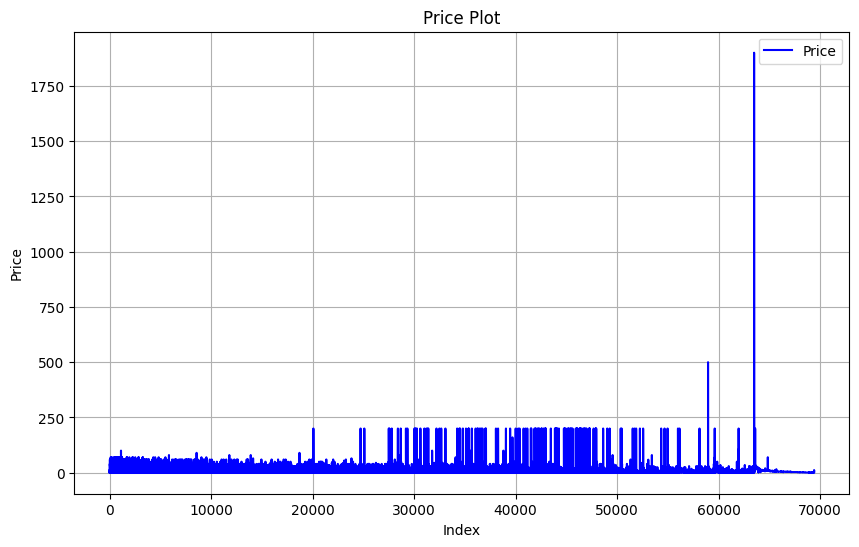

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df['price'], label='Price', color='blue')
plt.title('Price Plot')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

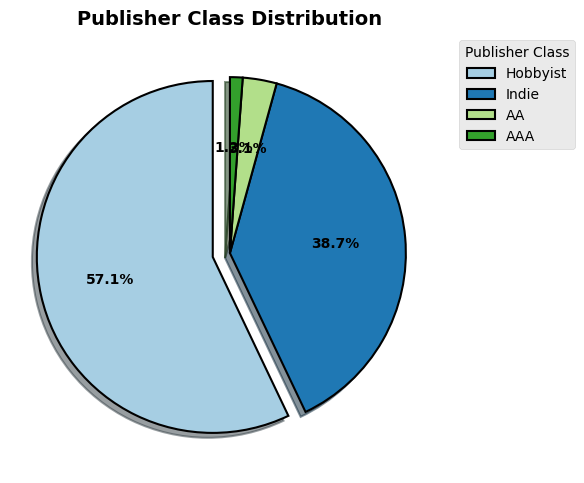

In [13]:
plt.style.use("ggplot")
publisher_class_counts = df['publisherClass'].value_counts()
explode = [0.1 if i == 0 else 0 for i in range(len(publisher_class_counts))]

plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    publisher_class_counts,
    labels=None,  
    autopct='%1.1f%%', 
    startangle=90,
    textprops={"fontweight": "bold"},
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
    colors=plt.cm.Paired.colors
)

plt.legend(patches, publisher_class_counts.index, loc='upper right', bbox_to_anchor=(1.3, 1), title="Publisher Class")
plt.title('Publisher Class Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [14]:
df['price'].value_counts()

price
0.00       10398
4.99        8047
0.99        7058
9.99        6912
1.99        5270
           ...  
4.95           1
5.30           1
2.69           1
1900.00        1
240.00         1
Name: count, Length: 295, dtype: int64

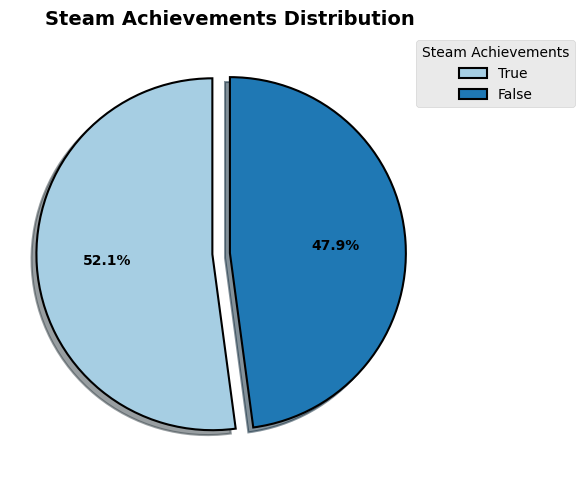

In [15]:
steam_achievements_counts = df['steam_achievements'].value_counts()
plt.style.use("ggplot")
explode = [0.1 if i == 0 else 0 for i in range(len(steam_achievements_counts))]
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    steam_achievements_counts,
    labels=None,  
    autopct='%1.1f%%',
    startangle=90,
    textprops={"fontweight": "bold"},
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
    colors=plt.cm.Paired.colors
)

plt.legend(
    patches,
    steam_achievements_counts.index,
    loc='upper right',
    bbox_to_anchor=(1.3, 1),
    title="Steam Achievements"
)


plt.title('Steam Achievements Distribution', fontsize=14, fontweight='bold')


plt.tight_layout()
plt.show()

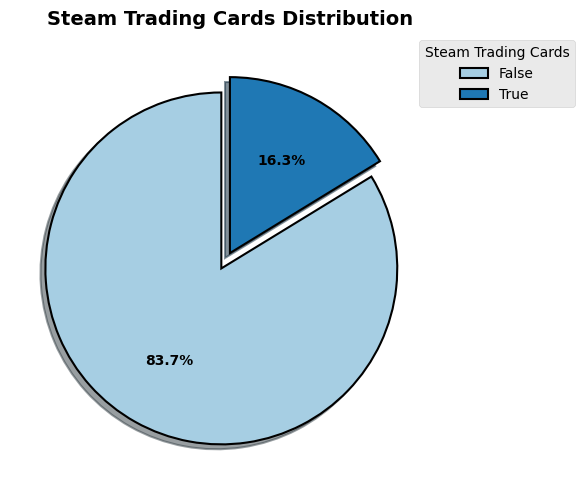

In [16]:
steam_trading_cards_counts = df['steam_trading_cards'].value_counts()
plt.style.use("ggplot")
explode = [0.1 if i == 0 else 0 for i in range(len(steam_trading_cards_counts))]
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    steam_trading_cards_counts,
    labels=None,  
    autopct='%1.1f%%',
    startangle=90,
    textprops={"fontweight": "bold"},
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
    colors=plt.cm.Paired.colors
)

plt.legend(
    patches,
    steam_trading_cards_counts.index,
    loc='upper right',
    bbox_to_anchor=(1.3, 1),
    title="Steam Trading Cards"
)


plt.title('Steam Trading Cards Distribution', fontsize=14, fontweight='bold')


plt.tight_layout()
plt.show()

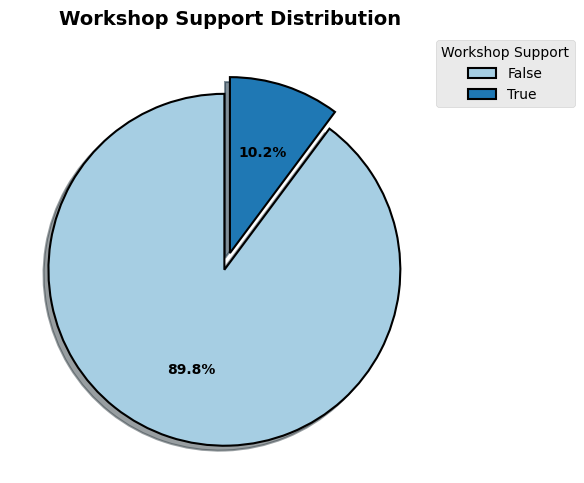

In [17]:
workshop_support_counts = df['workshop_support'].value_counts()
plt.style.use("ggplot")
explode = [0.1 if i == 0 else 0 for i in range(len(workshop_support_counts))]
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    workshop_support_counts,
    labels=None,  
    autopct='%1.1f%%',
    startangle=90,
    textprops={"fontweight": "bold"},
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
    colors=plt.cm.Paired.colors
)

plt.legend(
    patches,
    workshop_support_counts.index,
    loc='upper right',
    bbox_to_anchor=(1.3, 1),
    title="Workshop Support"
)


plt.title('Workshop Support Distribution', fontsize=14, fontweight='bold')


plt.tight_layout()
plt.show()

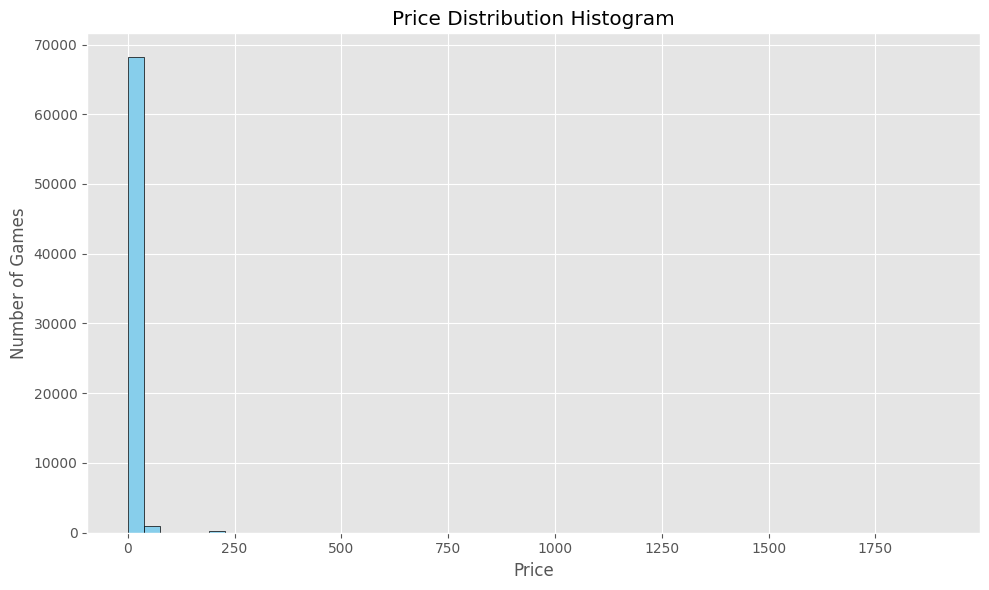

In [18]:
price_counts = df['price'].value_counts().sort_index()
expanded_prices = np.repeat(price_counts.index, price_counts.values)
plt.figure(figsize=(10, 6))
plt.hist(expanded_prices, bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution Histogram')
plt.xlabel('Price')
plt.ylabel('Number of Games')
plt.grid(True)
plt.tight_layout()
plt.show()

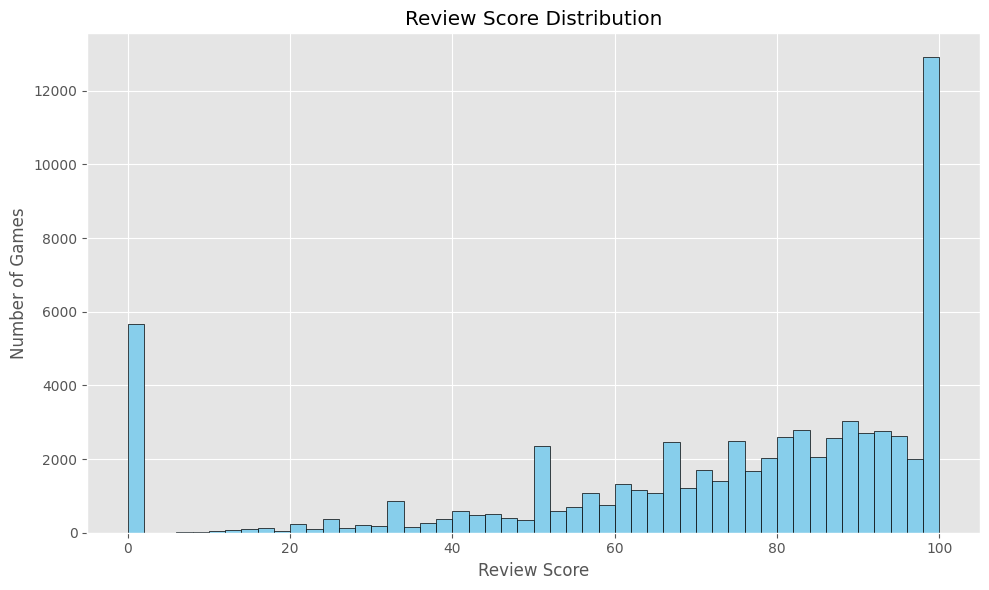

In [19]:
review_score_counts = df['reviewScore'].value_counts().sort_index()
expanded_review_scores = np.repeat(review_score_counts.index, review_score_counts.values)
plt.figure(figsize=(10, 6))
plt.hist(expanded_review_scores, bins=50, color='skyblue', edgecolor='black')  
plt.title('Review Score Distribution')
plt.xlabel('Review Score')
plt.ylabel('Number of Games')
plt.grid(True)
plt.tight_layout()
plt.show()

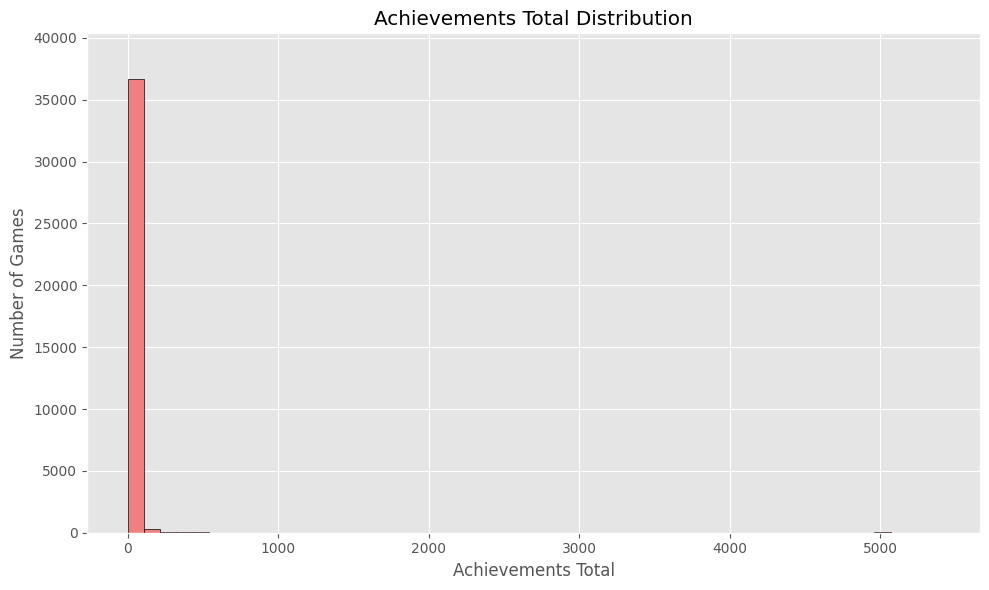

In [20]:
achievements_counts = df['achievements_total'].value_counts().sort_index()
expanded_achievements = np.repeat(achievements_counts.index, achievements_counts.values)
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(expanded_achievements, bins=50, color='lightcoral', edgecolor='black')
plt.title('Achievements Total Distribution')
plt.xlabel('Achievements Total')
plt.ylabel('Number of Games')
plt.ylim(0, max(n) + (max(n) * 0.1))
plt.grid(True)
plt.tight_layout()
plt.show()


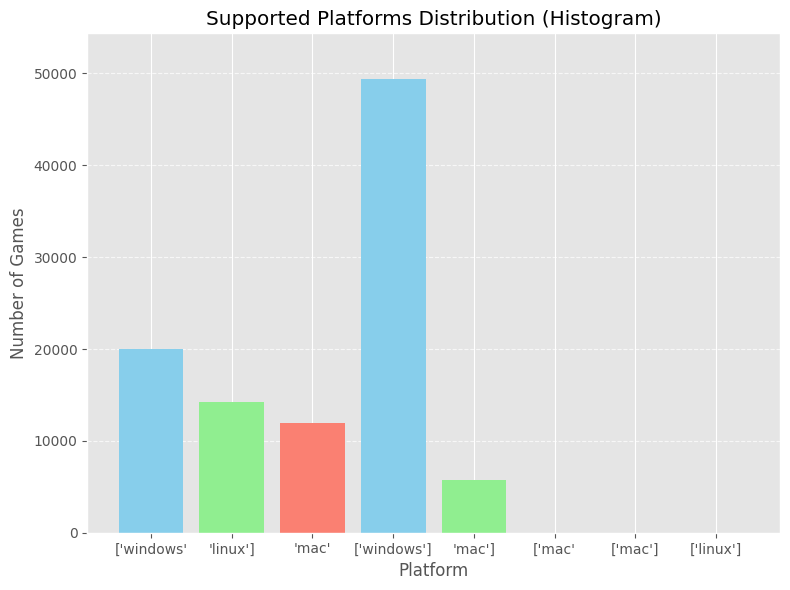

In [21]:
platform_list = []

for platforms in df['supported_platforms']:
    if isinstance(platforms, str):  
        platforms = platforms.lower().split(',')
        platform_list.extend([platform.strip() for platform in platforms])


platform_counts = Counter(platform_list)


plt.figure(figsize=(8, 6))
plt.bar(platform_counts.keys(), platform_counts.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Supported Platforms Distribution (Histogram)')
plt.xlabel('Platform')
plt.ylabel('Number of Games')


max_count = max(platform_counts.values())
plt.ylim(0, max_count + (max_count * 0.1))

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

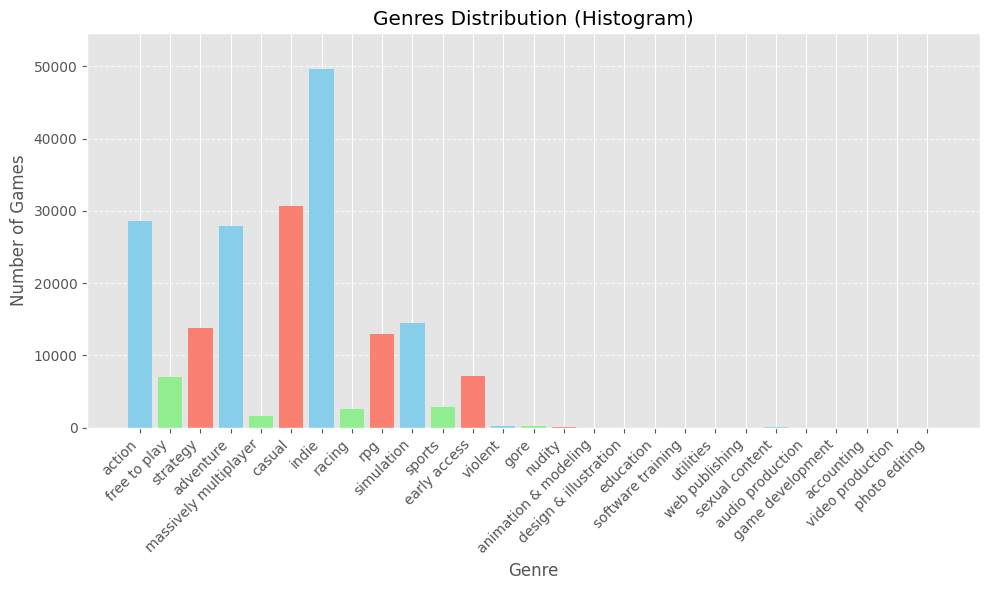

In [22]:
genres_list = []
for genres in df['genres']:
    if isinstance(genres, str): 
        genres = genres.lower().split(',')
        genres_list.extend([genre.strip() for genre in genres])


genres_counts = Counter(genres_list)


plt.figure(figsize=(10, 6))
plt.bar(genres_counts.keys(), genres_counts.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Genres Distribution (Histogram)')
plt.xlabel('Genre')
plt.ylabel('Number of Games')

max_count = max(genres_counts.values())
plt.ylim(0, max_count + (max_count * 0.1)) 

plt.xticks(rotation=45, ha="right") 
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Missing values in 'release_date': 1223


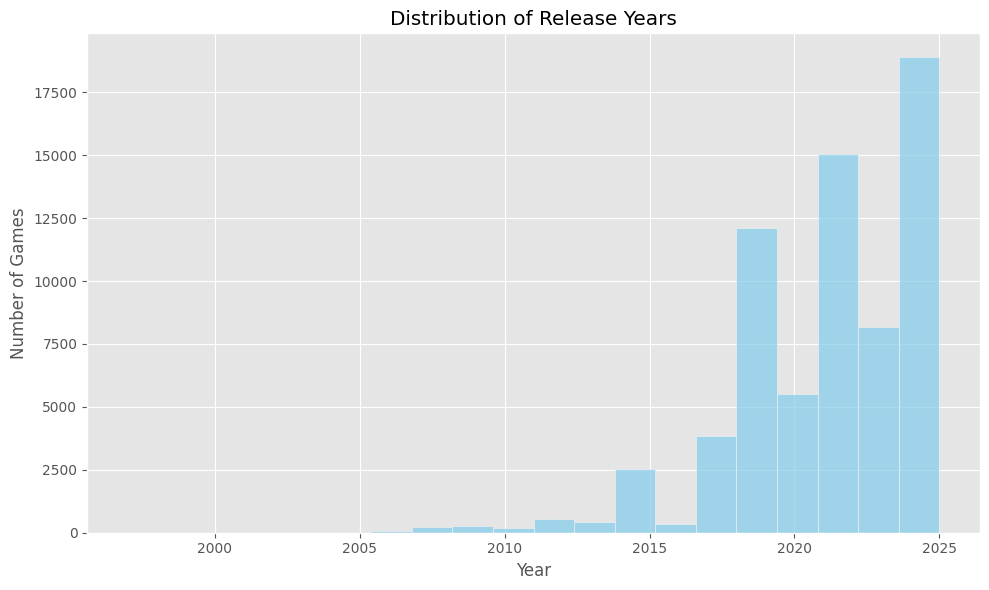

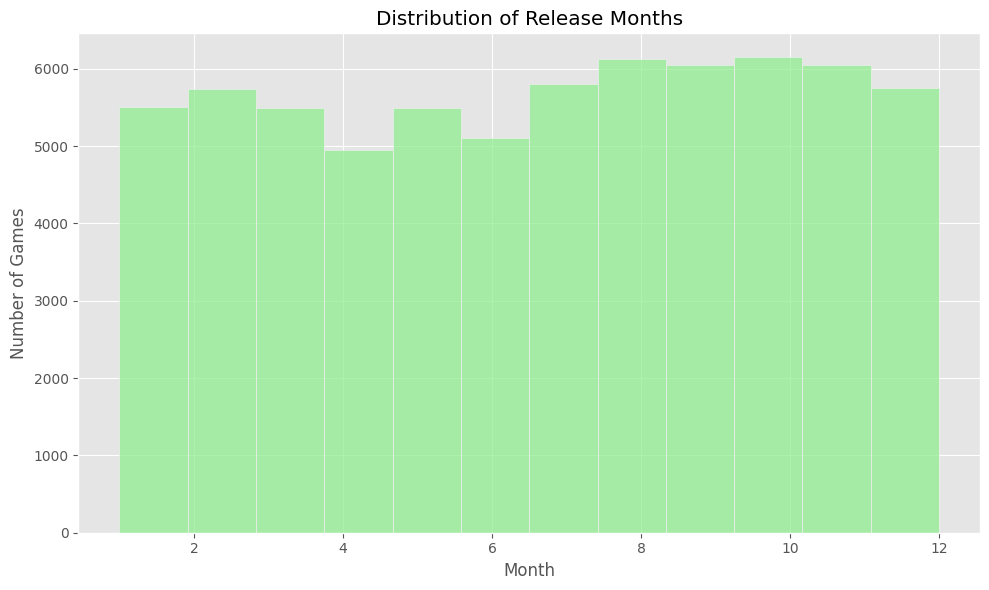

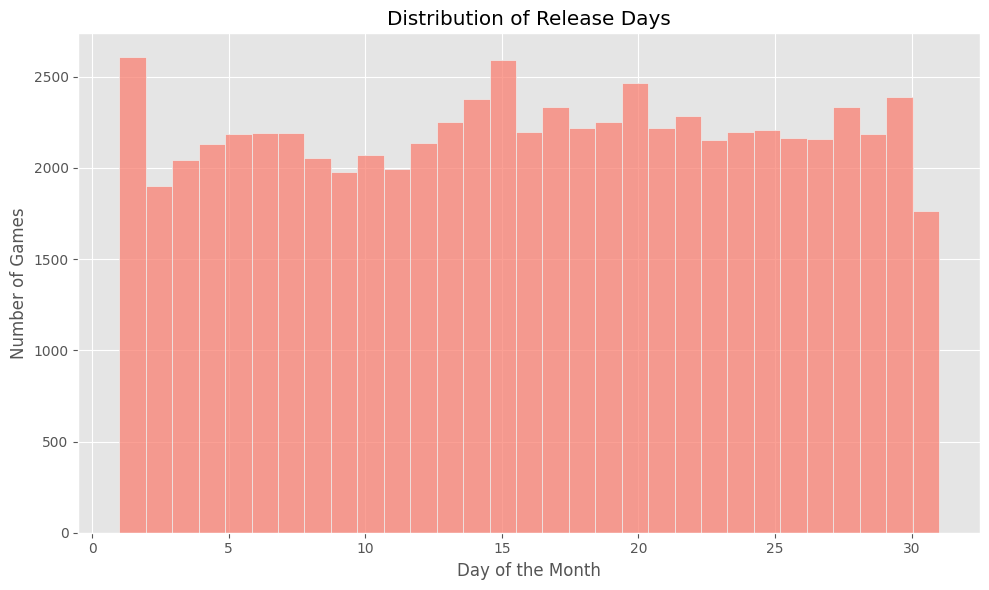

In [23]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

print(f"Missing values in 'release_date': {df['release_date'].isnull().sum()}")


df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month
df['day'] = df['release_date'].dt.day

plt.figure(figsize=(10, 6))
sns.histplot(df['year'].dropna(), kde=False, bins=20, color='skyblue')
plt.title('Distribution of Release Years')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(df['month'].dropna(), kde=False, bins=12, color='lightgreen')
plt.title('Distribution of Release Months')
plt.xlabel('Month')
plt.ylabel('Number of Games')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(df['day'].dropna(), kde=False, bins=31, color='salmon')
plt.title('Distribution of Release Days')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Games')
plt.grid(True)
plt.tight_layout()
plt.show()

## Bivariate Analysis

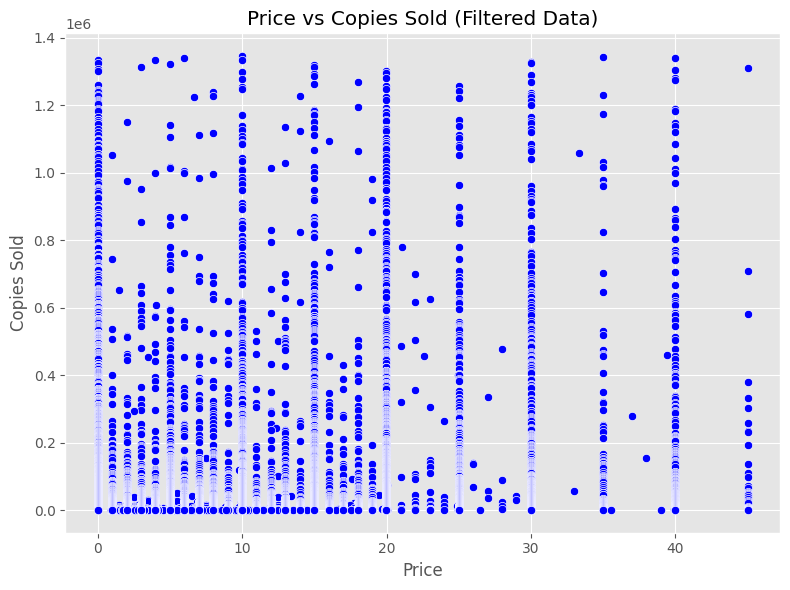

In [24]:
price_threshold = df['price'].quantile(0.99)  
copiesSold_threshold = df['copiesSold'].quantile(0.99)  

filtered_df = df[(df['price'] <= price_threshold) & (df['copiesSold'] <= copiesSold_threshold)]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='copiesSold', data=filtered_df, color='blue')
plt.title('Price vs Copies Sold (Filtered Data)')
plt.xlabel('Price')
plt.ylabel('Copies Sold')
plt.grid(True)
plt.tight_layout()
plt.show()

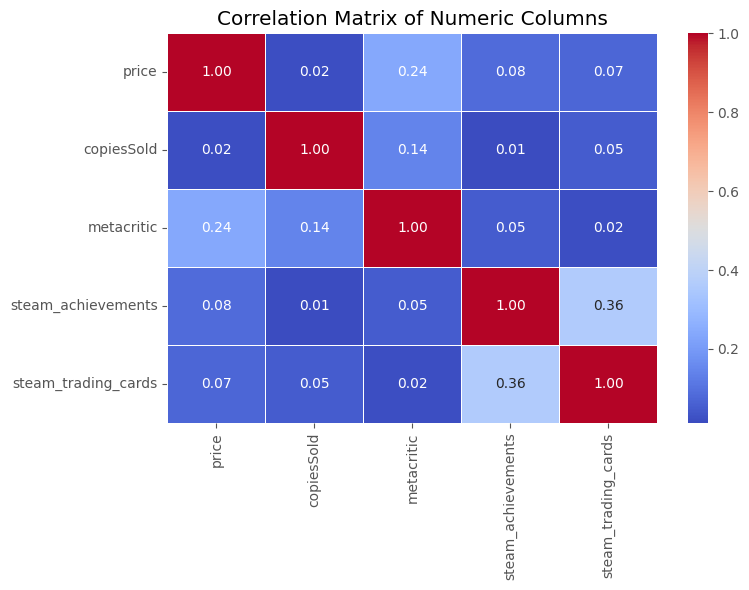

In [25]:
numeric_columns = ['price', 'copiesSold', 'metacritic', 'steam_achievements', 'steam_trading_cards']
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.tight_layout()
plt.show()

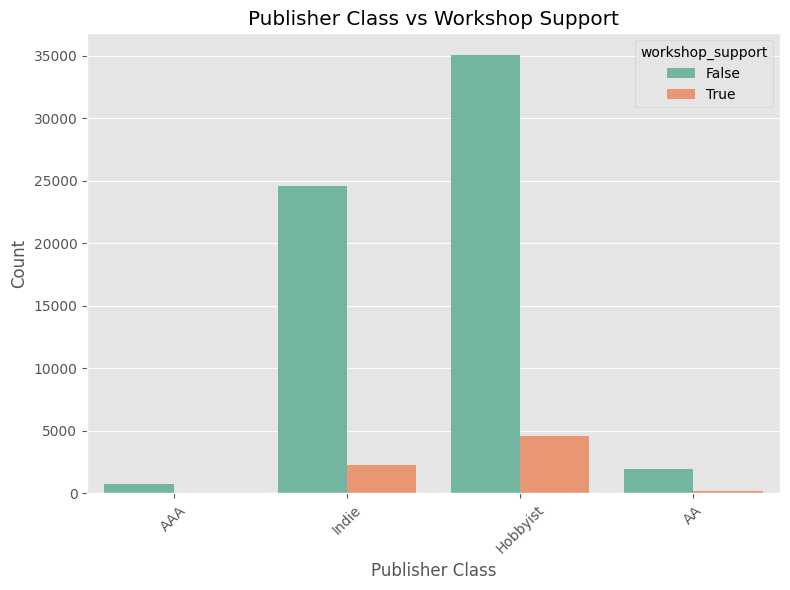

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='publisherClass', hue='workshop_support', data=df, palette='Set2')
plt.title('Publisher Class vs Workshop Support')
plt.xlabel('Publisher Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Additional Visualizations for Preprocessing Decisions

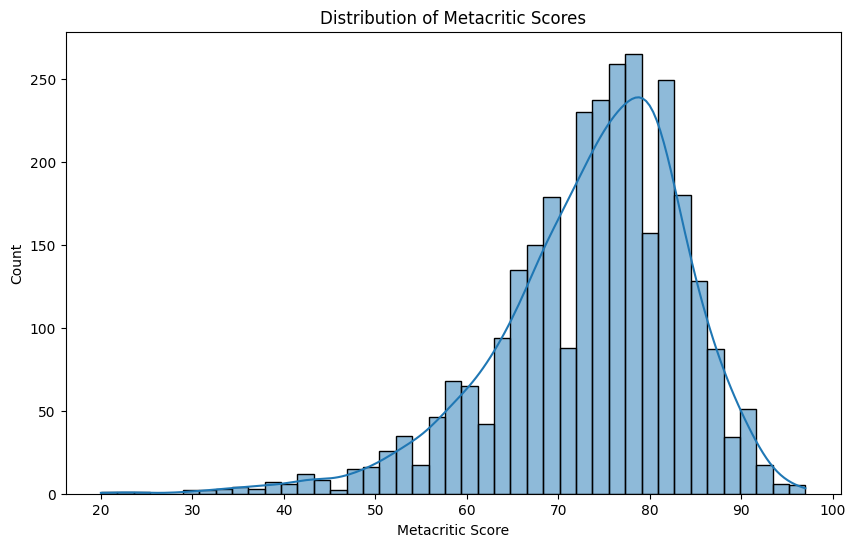

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['metacritic'].dropna(), kde=True)
plt.title('Distribution of Metacritic Scores')
plt.xlabel('Metacritic Score')
plt.ylabel('Count')
plt.show()



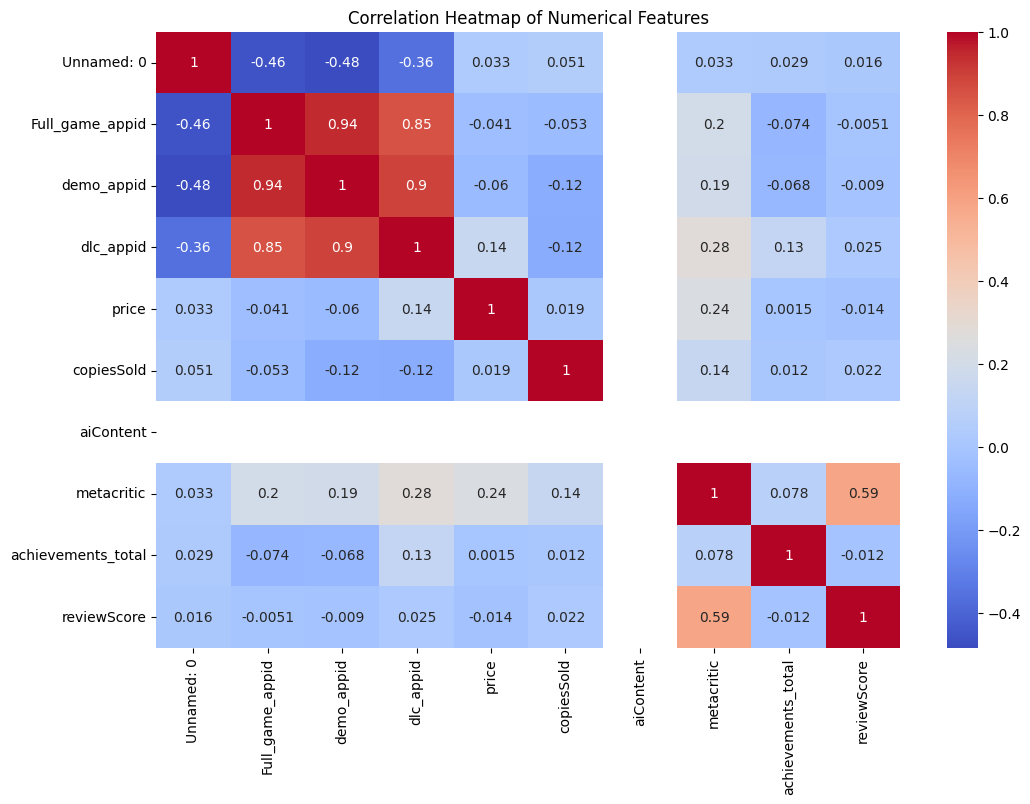

In [12]:
# Correlation Heatmap
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Preprocessing

In [14]:
# 1. Drop metacritic column
df = df.drop('metacritic', axis=1)

# 2. Impute achievements_total with 0
df['achievements_total'] = df['achievements_total'].fillna(0)

# 3. Impute genres with 'unknown'
df['genres'] = df['genres'].fillna('unknown')

# 4. Drop rows with missing release_date
df = df.dropna(subset=['release_date'])

# 5. Drop columns with high missing values
columns_to_drop = ['aiContent', 'Unnamed: 0', 'name_x', 'demo_appid', 'dlc_appid', 'name_y']
df = df.drop(columns=columns_to_drop)

# 6. Remove duplicate rows
df = df.drop_duplicates()

# Verify the changes
print("Shape after Previous preprocessing:", df.shape)
print("\nMissing values after preprocessing:")
print(df.isna().sum())

Shape after preprocessing: (69426, 13)

Missing values after preprocessing:
Full_game_appid        0
price                  0
copiesSold             0
publisherClass         0
name                   0
steam_achievements     0
steam_trading_cards    0
workshop_support       0
genres                 0
achievements_total     0
release_date           0
supported_platforms    0
reviewScore            0
dtype: int64


## Feature Engineering

In [27]:
print("Feature Engineering:")

Feature Engineering:


## Encoding

In [28]:
print("Encoding")

Encoding


# Feature Selection

## Over-Sampling of data using SMOTE

In [29]:
print("SMOTE")

SMOTE


# Data Splitting

# ML Models

## Model 1

In [30]:
print("Model 1")

Model 1


## Model 2

In [31]:
print("Model 2")

Model 2
